In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!unzip "/content/drive/MyDrive/YOLOv7/archive.zip" -d "/content"

Archive:  /content/drive/MyDrive/YOLOv7/archive.zip
replace /content/Update820/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Update820/README.dataset.txt  
  inflating: /content/Update820/README.roboflow.txt  
  inflating: /content/Update820/data.yaml  
  inflating: /content/Update820/test/images/A10_png.rf.392693ab4e5d4d9245ec9ab96ad93815.jpg  
  inflating: /content/Update820/test/images/A10_png.rf.9d5bd039e76fb95a256426daf5a4d59e.jpg  
  inflating: /content/Update820/test/images/A110_png.rf.1f28fa2dca18359f598f758646a23aa3.jpg  
  inflating: /content/Update820/test/images/A11_png.rf.7c184c3dffe9372ab86e5e7bcce2f210.jpg  
  inflating: /content/Update820/test/images/A133_png.rf.12680de70b2c8169a00f94bb8d563bc9.jpg  
  inflating: /content/Update820/test/images/A2187_png.rf.53af91f578bce07023d7782ae5f7512b.jpg  
  inflating: /content/Update820/test/images/A219_png.rf.cfec417dc9b10a63f3621ed889c6af25.jpg  
  inflating: /content/Update820/test/images/A27

In [3]:
!nvidia-smi

Wed Jan 24 16:26:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GXsxQGpFdCdHTC5pINue")
project = rf.workspace("contianer-dataset").project("container-7babl")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow 


Extracting Dataset Version Zip to Container-1 in yolov8:: 100%|██████████| 138/138 [00:00<00:00, 5651.32it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/Update820/data.yaml epochs=125 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 375MB/s]
New https://pypi.org/project/ultralytics/8.1.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Update820/data.yaml, epochs=125, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, l

/content


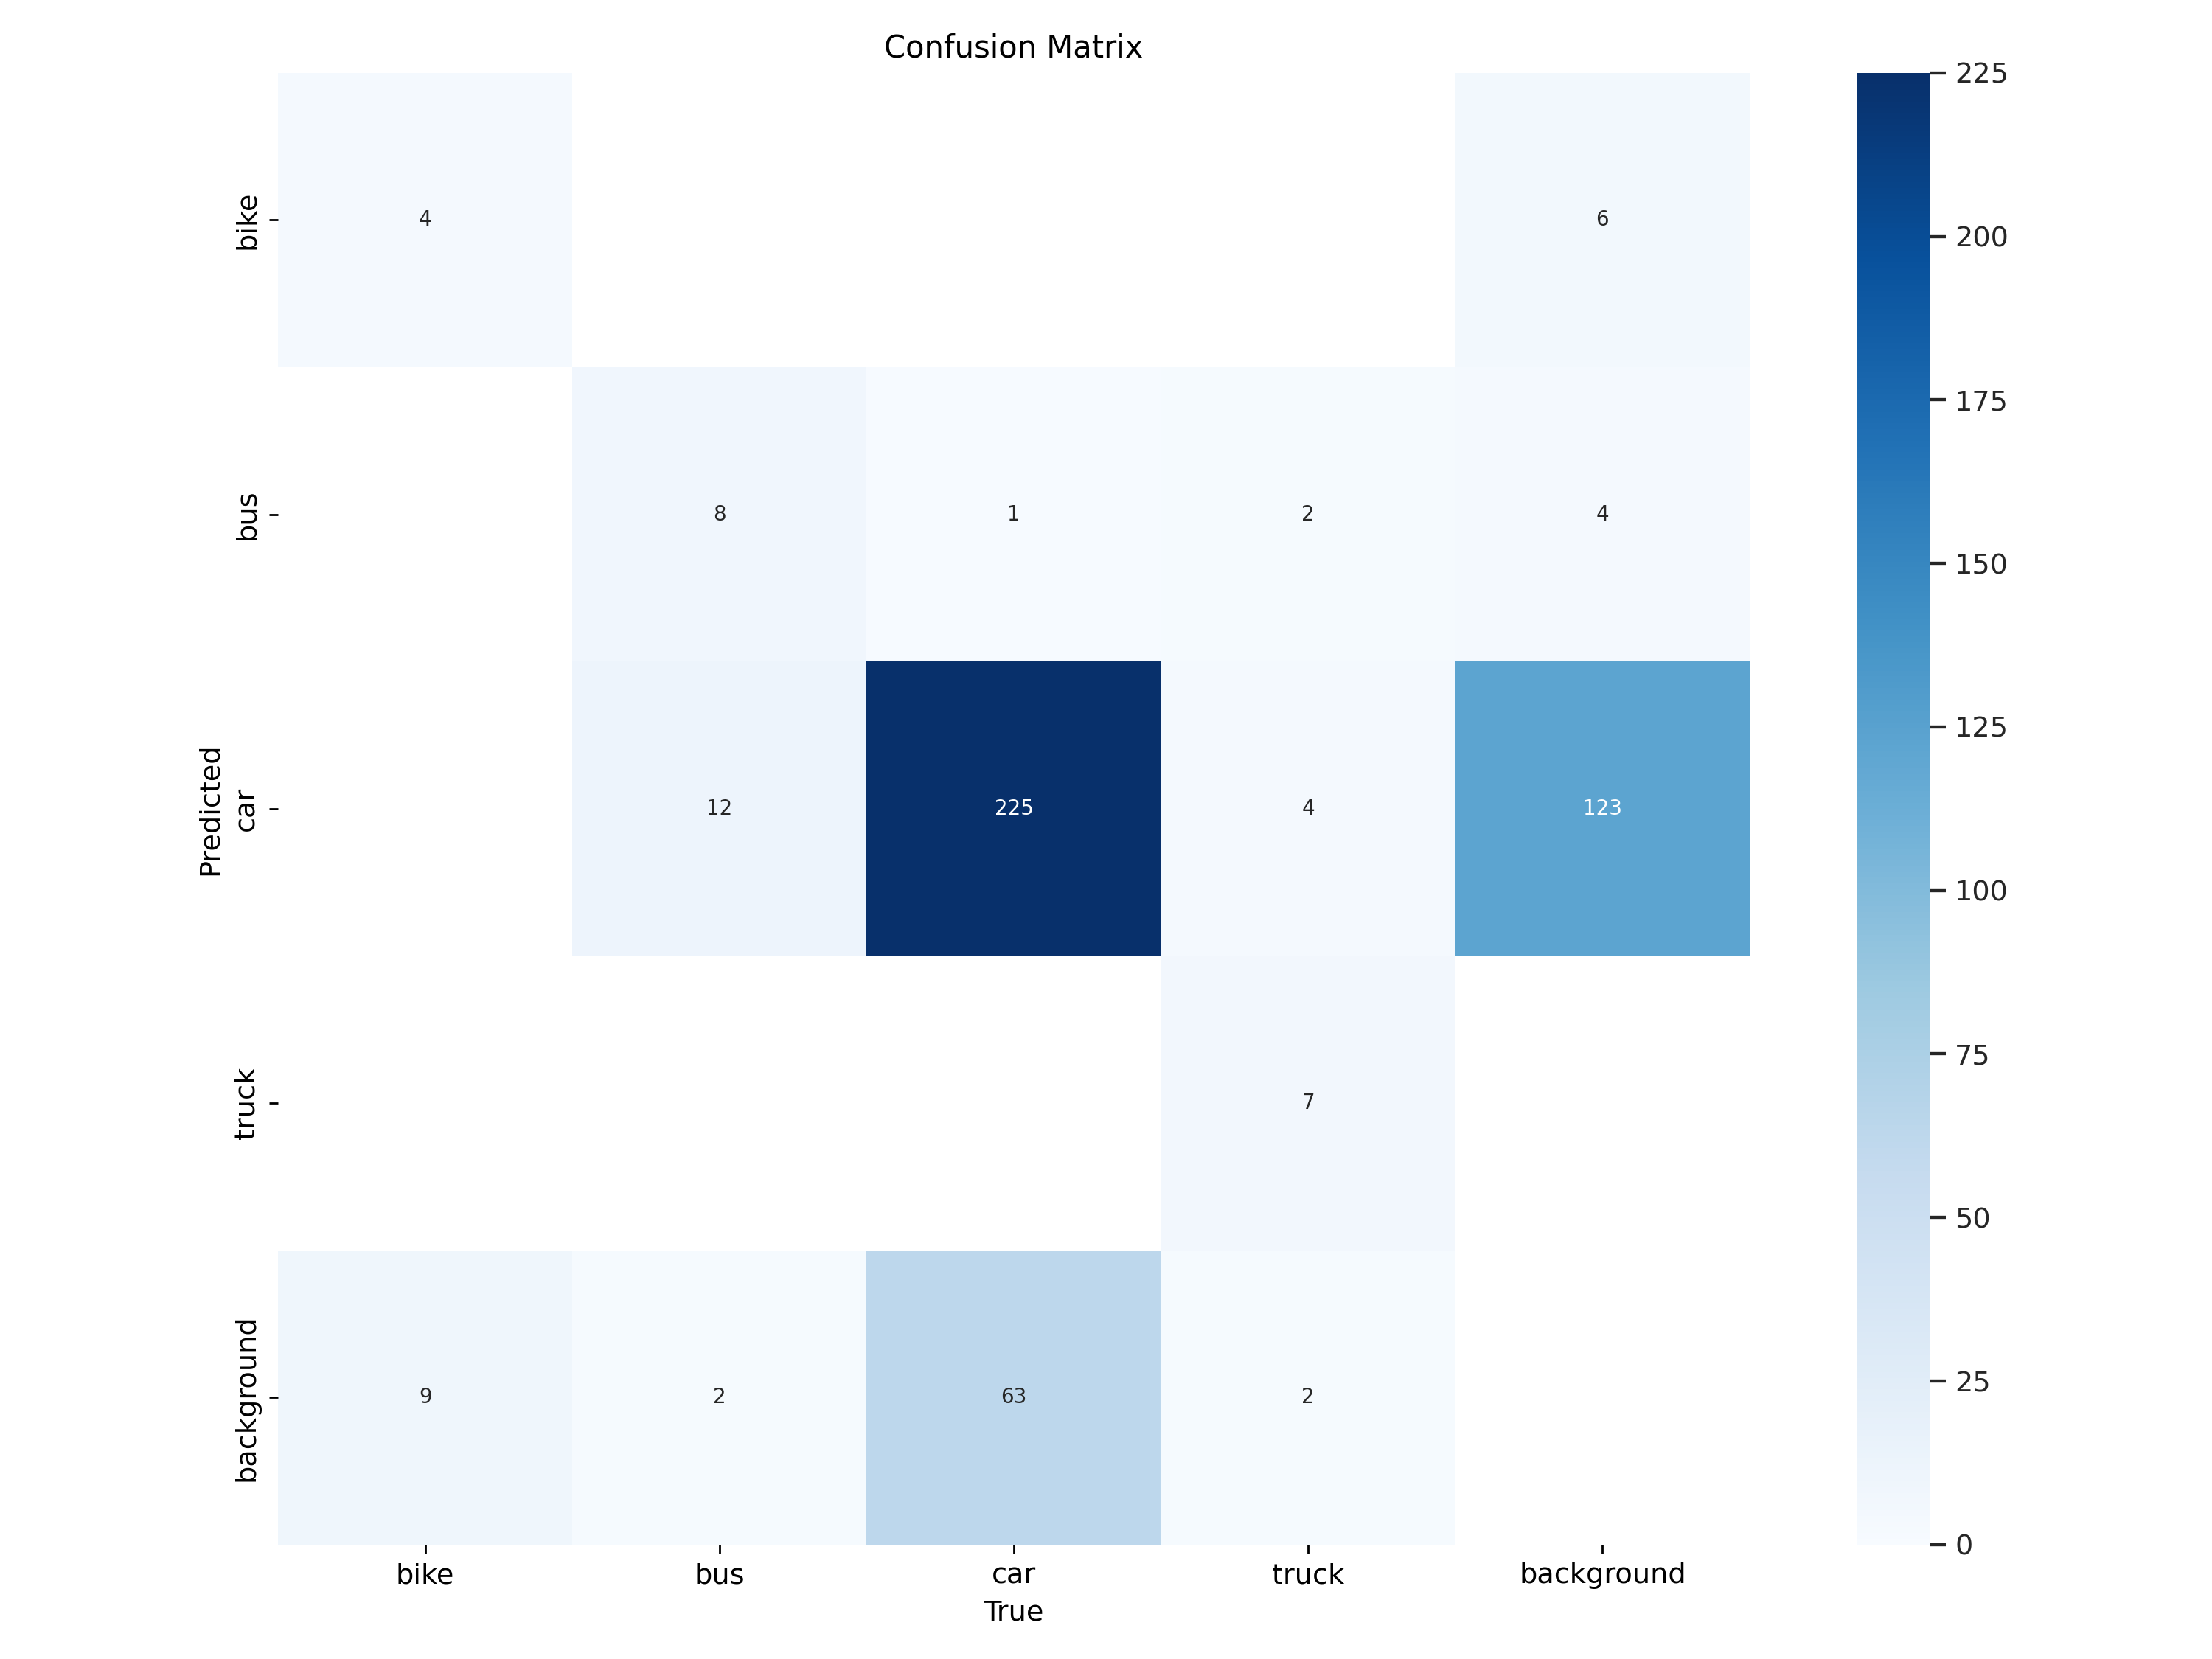

In [8]:
%cd {HOME}
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

/content


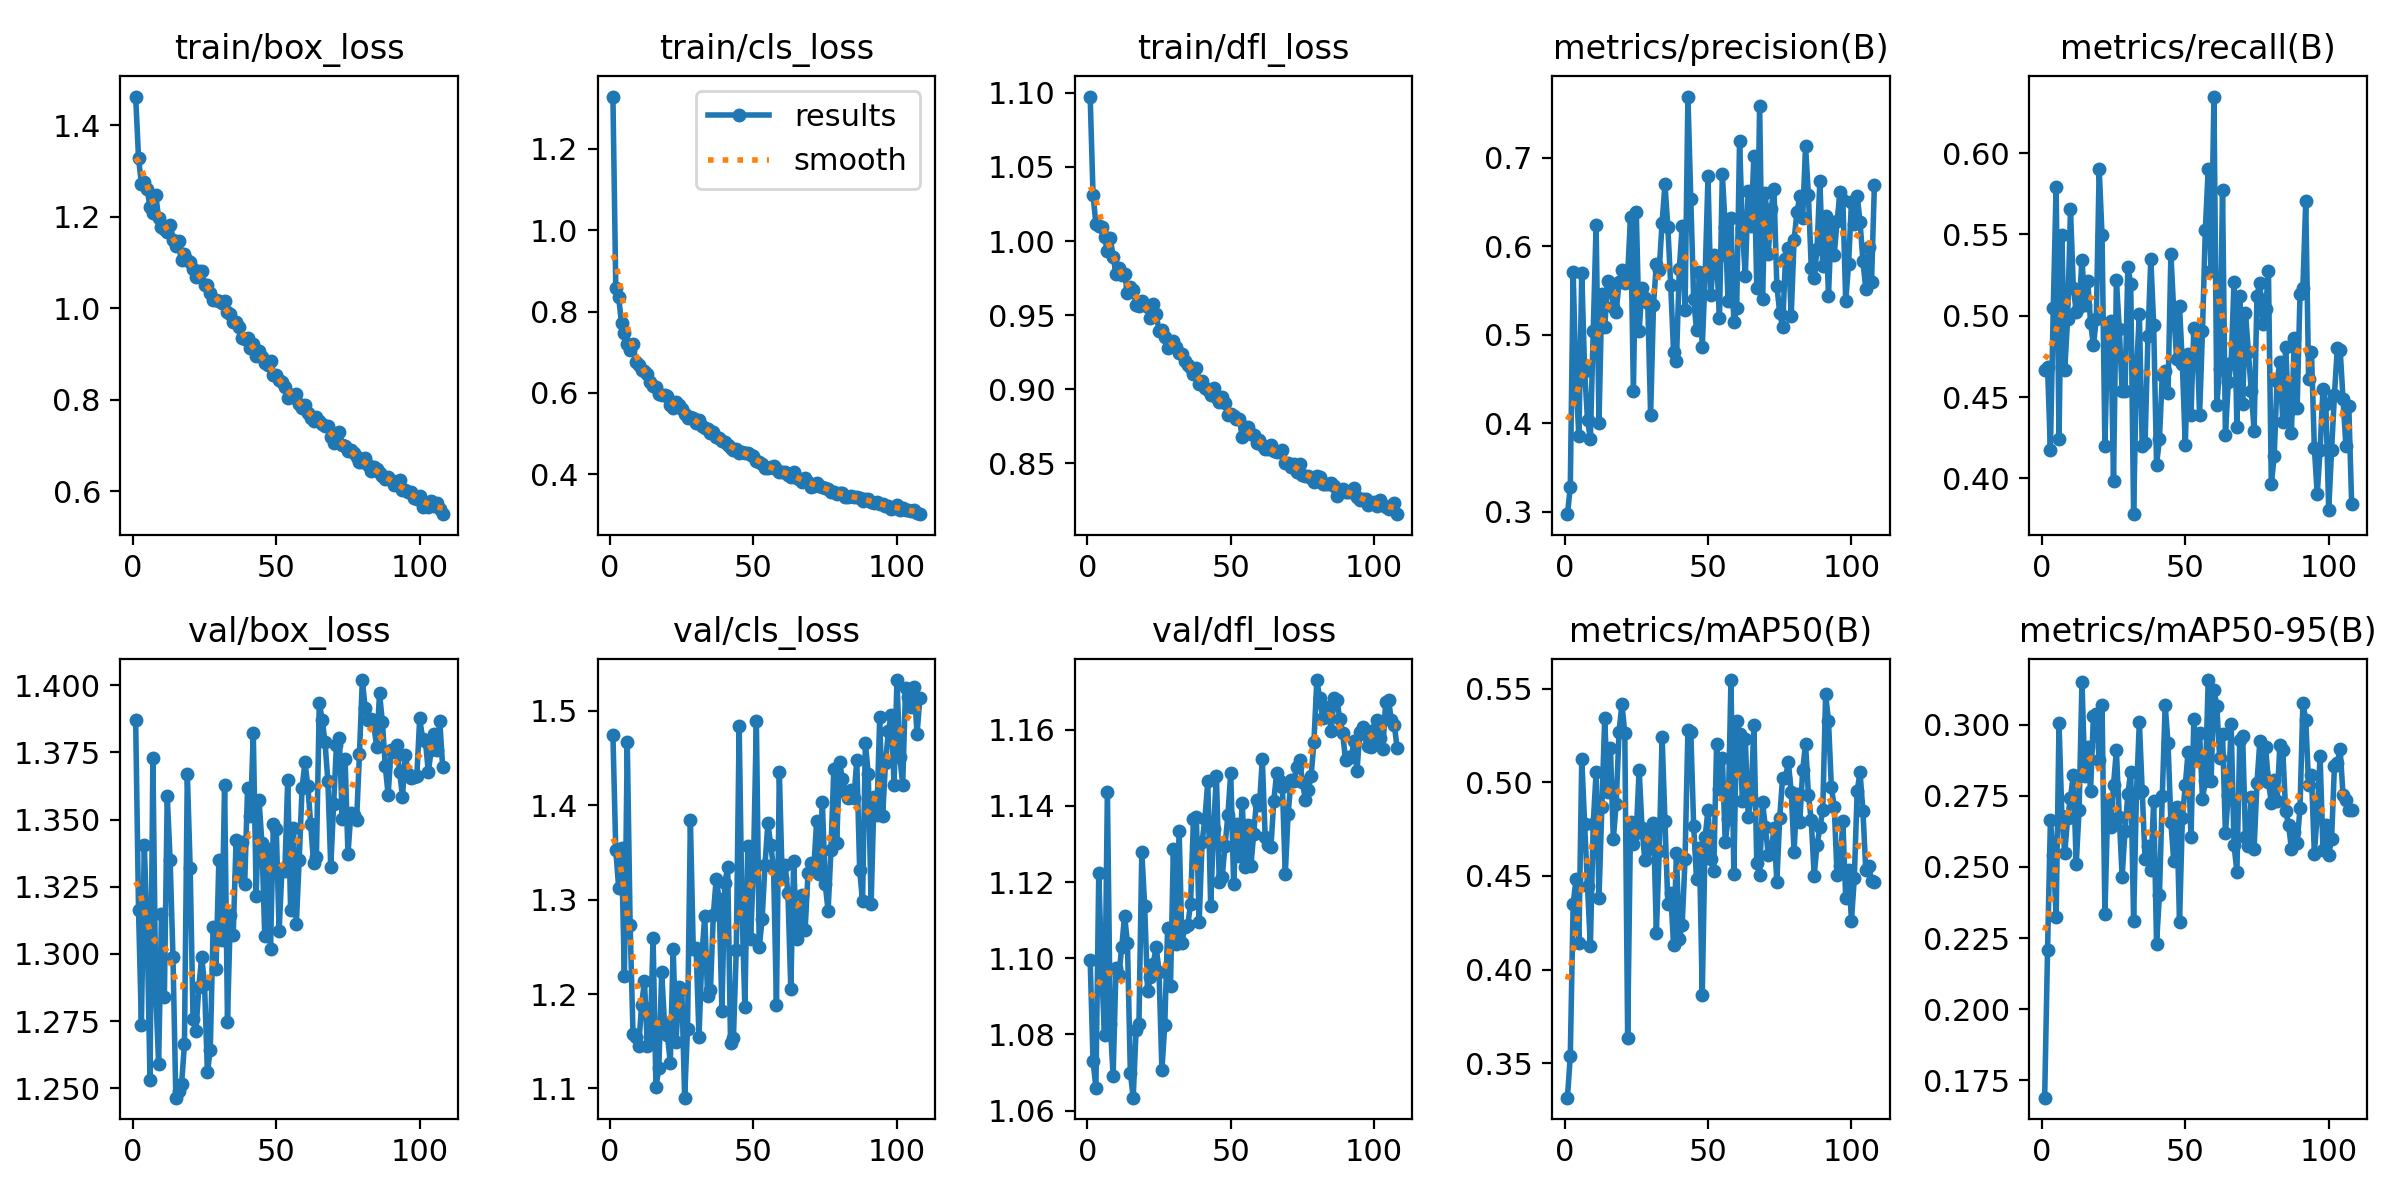

In [9]:
%cd {HOME}
Image(filename='/content/runs/detect/train/results.png', width=600)

/content


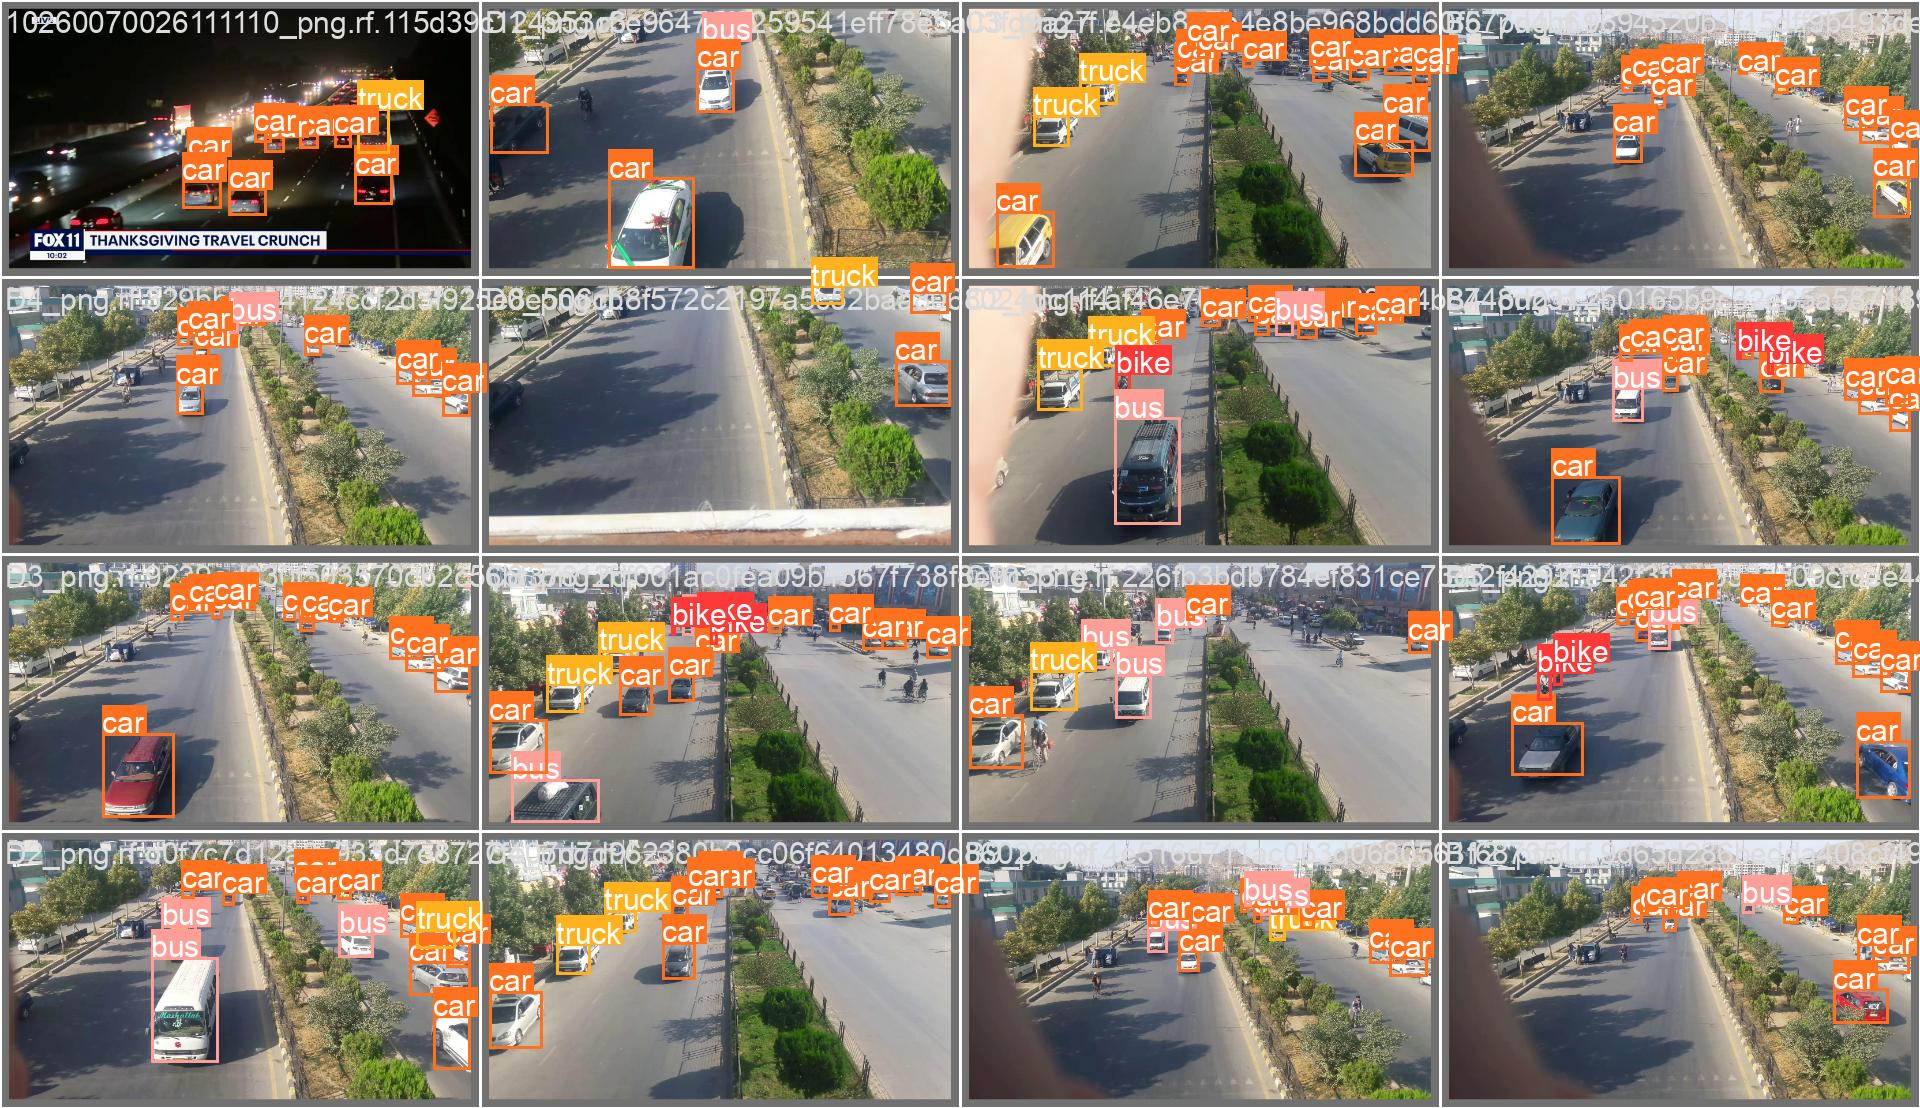

In [10]:
%cd {HOME}
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Update820/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Update820/valid/labels.cache... 31 images, 1 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.44s/it]
                   all         31        339      0.644      0.597      0.556      0.322
                  bike         31         13      0.442       0.49      0.403      0.183
                   bus         31         22      0.701      0.532      0.515      0.396
                   car         31        289      0.538      0.803      0.695      0.444
                 truck         31         15      0.894      0.565      0.612      0.266
Speed: 5.9ms preprocess, 16.6ms inference, 0.0ms loss, 32.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at 

## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Update820/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/Update820/test/images/A10_png.rf.392693ab4e5d4d9245ec9ab96ad93815.jpg: 800x800 2 buss, 16 cars, 3 trucks, 22.5ms
image 2/20 /content/Update820/test/images/A10_png.rf.9d5bd039e76fb95a256426daf5a4d59e.jpg: 480x800 1 bike, 2 buss, 8 cars, 68.8ms
image 3/20 /content/Update820/test/images/A110_png.rf.1f28fa2dca18359f598f758646a23aa3.jpg: 800x800 13 cars, 24.2ms
image 4/20 /content/Update820/test/images/A11_png.rf.7c184c3dffe9372ab86e5e7bcce2f210.jpg: 800x800 2 buss, 15 cars, 1 truck, 22.5ms
image 5/20 /content/Update820/test/images/A133_png.rf.12680de70b2c8169a00f94bb8d563bc9.jpg: 800x800 1 bus, 21 cars, 22.4ms
image 6/20 /content/Update820/test/images/A2187_png.rf.53af91f578bce07023d7782ae5f7512b.jpg: 800x800 1 bike, 11 cars, 1 truck, 22.4ms
image 7/20 /content/Update820/test/images/A219_png.rf